In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import datasets, layers, models
from PIL import Image
import cv2


In [2]:
data=tf.keras.datasets.mnist.load_data(path="mnist.npz")


In [3]:
(X_train,y_train),(X_test,y_test)=data

In [4]:
# Normailising the all pixles by 255 basically all images have the pixles b/w 0 to 255 so
X_train=X_train/255.0
X_test=X_test/255.0

In [5]:
# Map for human readable class names
class_names = [str(i) for i in range(10)]


In [6]:
print(y_train)

[5 0 4 ... 5 6 8]


In [7]:
print(X_train.shape)

(60000, 28, 28)


In [8]:
# Reshape the data
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))

In [9]:
# Normailising the all pixles by 255 basically all images have the pixles b/w 0 to 255 so
X_train=X_train/255.0
X_test=X_test/255.0

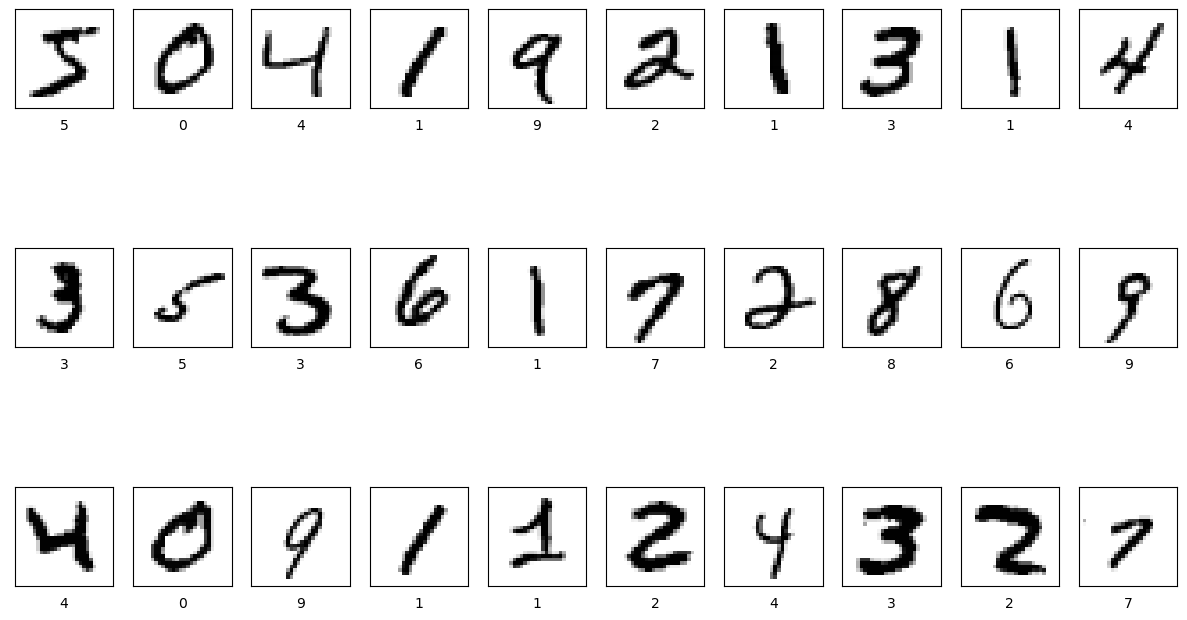

In [10]:
plt.figure(figsize=(15,15))
for i in range(30):
    plt.subplot(5,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout

In [12]:
# Building the CNN Model
model = models.Sequential()
model.add(layers.Conv2D(34,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
# model.add(layers.Conv2D(16,(4,4),activation='relu'))
# model.add(layers.MaxPooling2D((2,2)))

In [13]:
# Add Desne layers after flatting the layers of CNN and add dense layers now its an ANN 
model.add(layers.Flatten())
# Adding dense layers from here ANN will start
model.add(layers.Dense(34,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))
# our output categories are ten so
model.add(layers.Dense(10))

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 34)        340       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 34)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        19648     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 34)                5

In [15]:
callback=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=0,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [16]:
# Compiling the model
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])
history=model.fit(X_train,y_train,epochs=15,validation_data=(X_test,y_test), callbacks=[callback])
model.save("mynumbers_model.h5")

# history=model.fit(X_train,y_train,epochs=15,validation_data=(X_test,y_test))

Epoch 1/15
1875/1875 [==============================] - 24s 12ms/step - loss: 2.2449 - accuracy: 0.1441 - val_loss: 1.8288 - val_accuracy: 0.3030
Epoch 2/15
1875/1875 [==============================] - 26s 14ms/step - loss: 1.5617 - accuracy: 0.3119 - val_loss: 1.4441 - val_accuracy: 0.3309
Epoch 3/15
1875/1875 [==============================] - 29s 15ms/step - loss: 1.2861 - accuracy: 0.4641 - val_loss: 1.0739 - val_accuracy: 0.5700
Epoch 4/15
1875/1875 [==============================] - 23s 12ms/step - loss: 0.9839 - accuracy: 0.6042 - val_loss: 0.8997 - val_accuracy: 0.6445
Epoch 5/15
1875/1875 [==============================] - 21s 11ms/step - loss: 0.8543 - accuracy: 0.6765 - val_loss: 0.7933 - val_accuracy: 0.7073
Epoch 6/15
1875/1875 [==============================] - 20s 11ms/step - loss: 0.7427 - accuracy: 0.7391 - val_loss: 0.6826 - val_accuracy: 0.7570
Epoch 7/15
1875/1875 [==============================] - 22s 11ms/step - loss: 0.6382 - accuracy: 0.7973 - val_loss: 0.5777 -

313/313 - 1s - loss: 0.1927 - accuracy: 0.9609 - 1s/epoch - 4ms/step


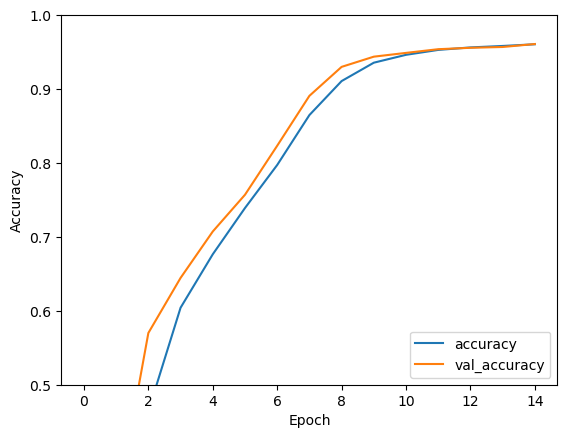

In [17]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)


In [18]:
# Get the user input image and preprocess it
image = cv2.imread('100.png', cv2.IMREAD_GRAYSCALE)
# image = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
image = cv2.resize(image, (28, 28))
image = np.array([image])
image = image / 255.0
image = image.reshape(image.shape[0], 28, 28, 1)

In [19]:
model = keras.models.load_model("mynumbers_model.h5")

predictions = model.predict(image)
class_index = np.argmax(predictions[0])
print('Predicted class:', class_names[class_index])

1/1 [==============================] - 0s 192ms/step
Predicted class: 6


In [20]:
predictions[0]

array([  3.0119908,  -4.6131706,   3.5434532, -12.032026 ,   3.4270272,
       -12.966841 ,   7.61524  , -10.431108 ,  -3.3153348, -11.593495 ],
      dtype=float32)

In [21]:
type(class_names)

list